## cooldown and warmup

### cooldown and warmup (wsd)

In [ ]:
## 先把ablation study 的learning rate schedule 画出来 （wsd）



读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.077    435.747  0.161056
2   400  0.007     5.415    224.732  0.202323
3   600  0.011     4.885    132.352  0.254307
4   800  0.014     4.592     98.691  0.286259
找到 45 条 Iter 在 6000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.091    441.828  0.159713
2   400  0.007     5.456    234.225  0.198925
3   600  0.011     4.908    135.384  0.251707
4   800  0.014     4.594     98.869  0.284653
找到 45 条 Iter 在 6000 和 14800 之间的数据

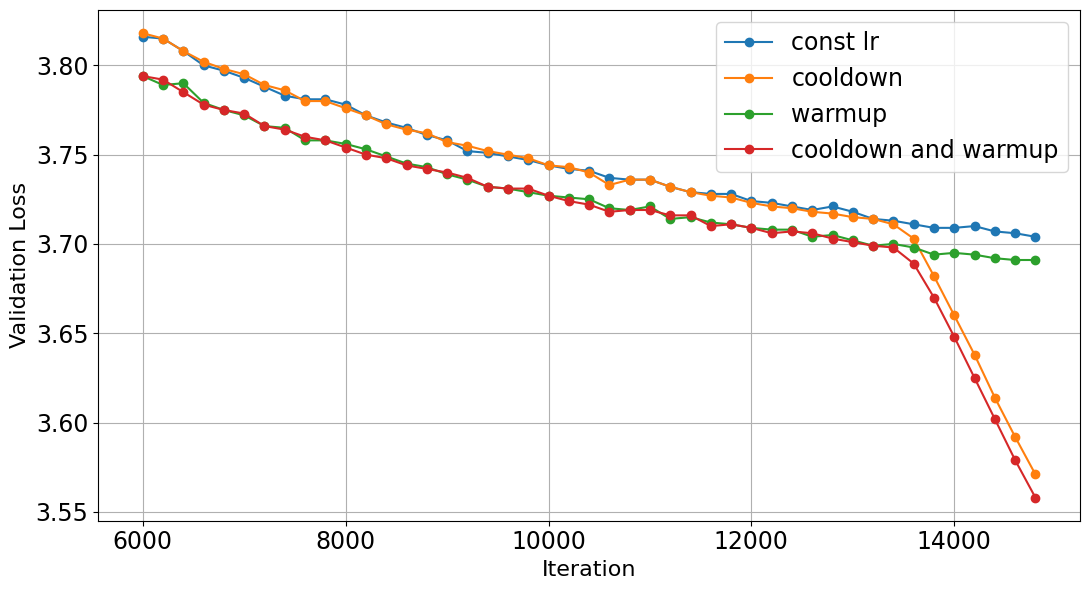

In [2]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
                'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17


# 创建图形
plt.figure(figsize=(11, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 6000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['const lr', 'cooldown', 'warmup', 'cooldown and warmup']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Validation Loss', fontsize=16)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=17)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/WarmupAndCooldown_wsd.pdf')

plt.show()


### cooldown and warmup (cosine)

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.077    435.747  0.161056
2   400  0.007     5.415    224.732  0.202323
3   600  0.011     4.885    132.352  0.254307
4   800  0.014     4.592     98.691  0.286259
找到 45 条 Iter 在 6000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.080    436.878  0.160581
2   400  0.007     5.400    221.389  0.203635
3   600  0.011     4.860    129.040  0.257040
4   800  0.014     4.583     97.831  0.286466
找到 45 条 Iter 在 6000 和 14800 之间的数据

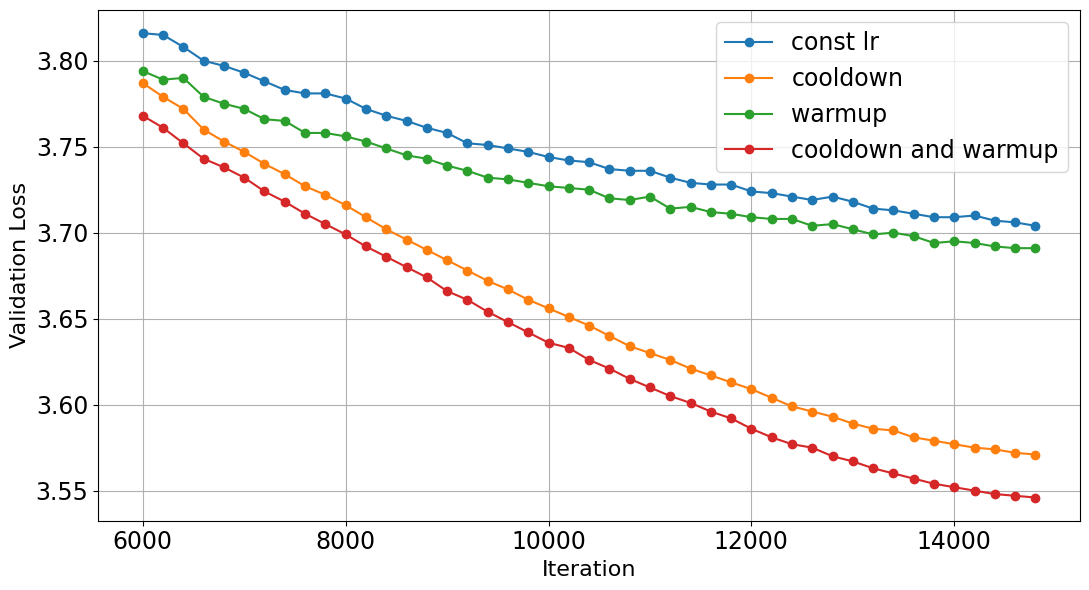

In [3]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
                'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径
## 这里的第三个choice实际上有点问题，因为warmup用的是wsd而不是cos。


prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17


# 创建图形
plt.figure(figsize=(11, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 6000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['const lr', 'cooldown', 'warmup', 'cooldown and warmup']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Validation Loss', fontsize=16)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=17)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/WarmupAndCooldown_cos.pdf')

plt.show()


## Effect of cooldown (mainly about wsd)

### warmup 0 w/0 cosine

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.077    435.747  0.161056
2   400  0.007     5.415    224.732  0.202323
3   600  0.011     4.885    132.352  0.254307
4   800  0.014     4.592     98.691  0.286259
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.091    441.828  0.159713
2   400  0.007     5.456    234.225  0.198925
3   600  0.011     4.908    135.384  0.251707
4   800  0.014     4.594     98.869  0.284653
找到 65 条 Iter 在 2000 和 14800 之间的数据

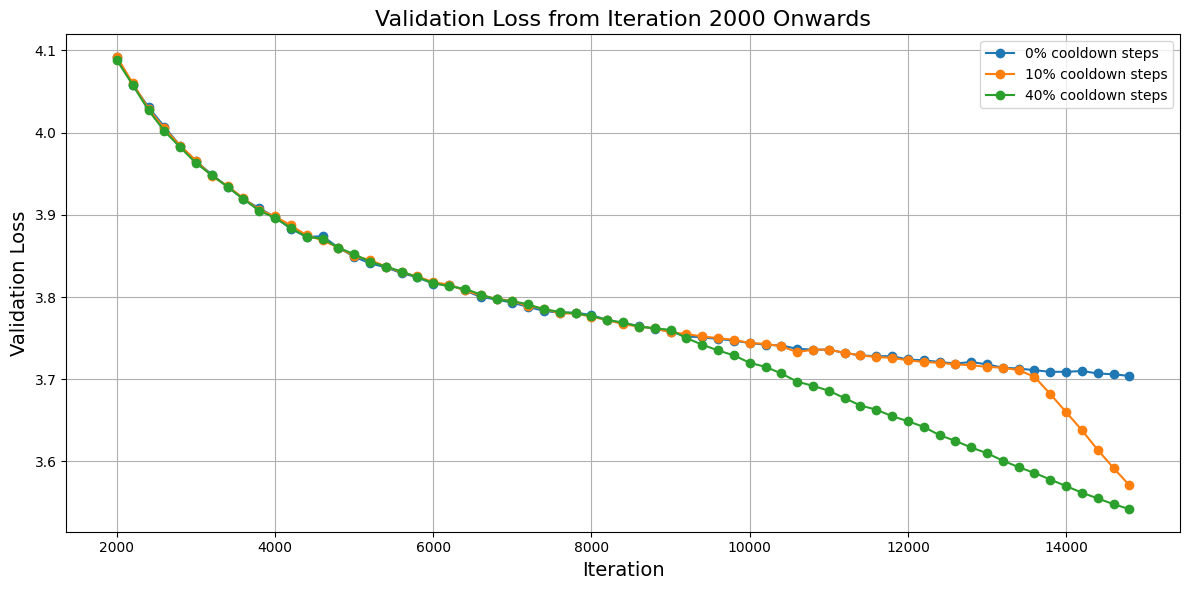

In [5]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(12, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps', '10% cooldown steps', '40% cooldown steps']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup0.pdf')

plt.show()


### warmup 1500 w/0 cosine

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.382    591.119  0.172903
2   400  0.007     5.557    259.011  0.206368
3   600  0.011     5.089    162.279  0.233029
4   800  0.014     4.649    104.444  0.279470
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.391    596.349  0.172157
2   400  0.007     5.559    259.502  0.206096
3   600  0.011     5.085    161.591  0.232778
4   800  0.014     4.647    104.288  0.279596
找到 65 条 Iter 在 2000 和 14800

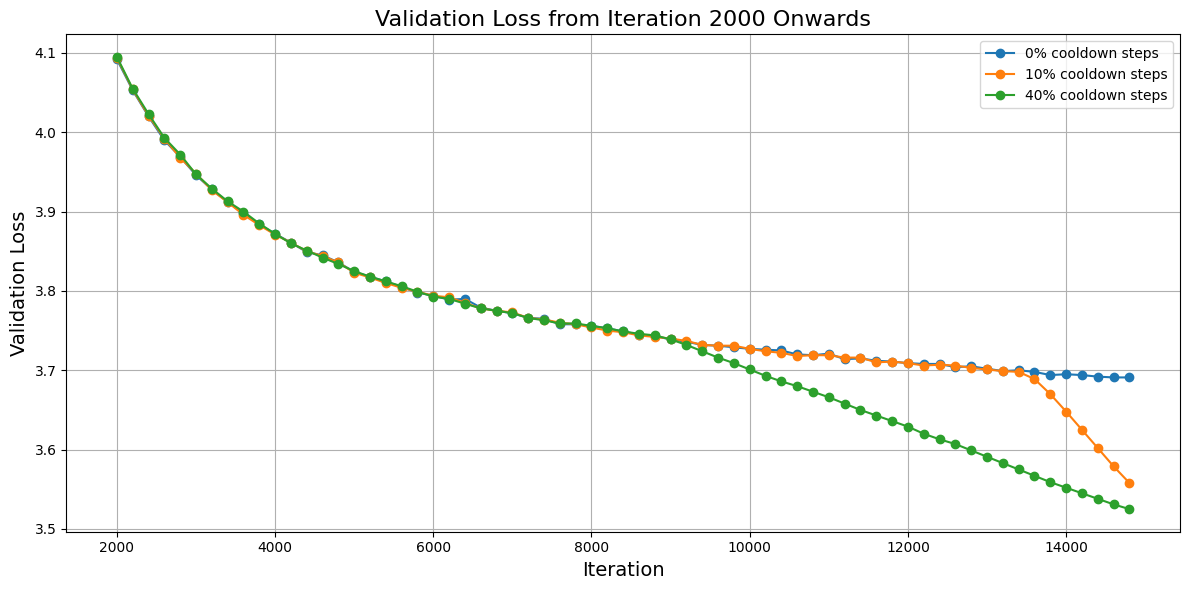

In [8]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(12, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps', '10% cooldown steps', '40% cooldown steps']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Validation Loss', fontsize=14)
plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup1500.pdf')

plt.show()


## warmup300 w/0 cosine

In [ ]:
## 

### warmup0 w/ cosine

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.077    435.747  0.161056
2   400  0.007     5.415    224.732  0.202323
3   600  0.011     4.885    132.352  0.254307
4   800  0.014     4.592     98.691  0.286259
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.091    441.828  0.159713
2   400  0.007     5.456    234.225  0.198925
3   600  0.011     4.908    135.384  0.251707
4   800  0.014     4.594     98.869  0.284653
找到 65 条 Iter 在 2000 和 14800 之间的数据

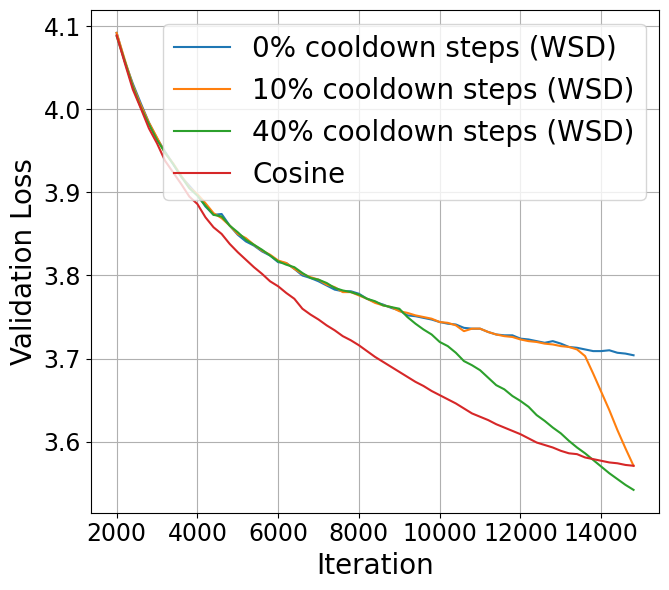

In [4]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17


# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(7, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps (WSD)', '10% cooldown steps (WSD)', '40% cooldown steps (WSD)', 'Cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup0_w_cos.pdf')

plt.show()


### 0 加上初始

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.077    435.747  0.161056
2   400  0.007     5.415    224.732  0.202323
3   600  0.011     4.885    132.352  0.254307
4   800  0.014     4.592     98.691  0.286259
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.091    441.828  0.159713
2   400  0.007     5.456    234.225  0.198925
3   600  0.011     4.908    135.384  0.251707
4   800  0.014     4.594     98.869  0.284653
找到 65 条 Iter 在 2000 和 14800 之间的数据

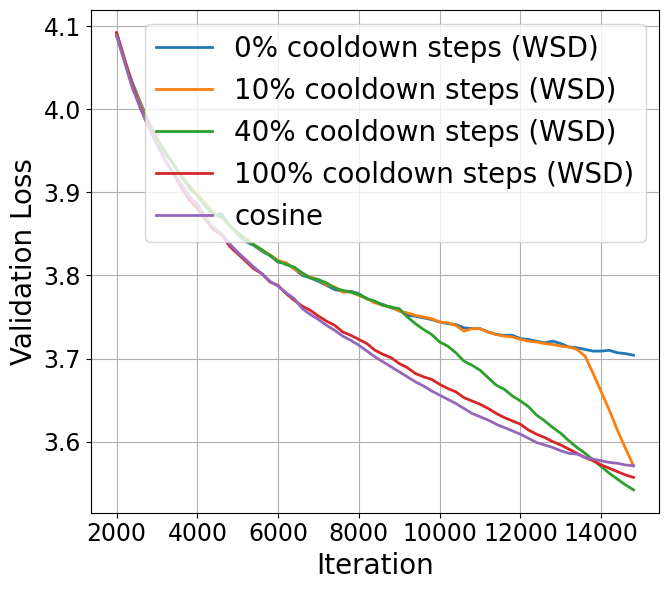

In [9]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_1.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(7, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps (WSD)', '10% cooldown steps (WSD)', '40% cooldown steps (WSD)', '100% cooldown steps (WSD)', 'cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', linewidth = 2, label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup0_w_cos_100.pdf')

plt.show()


### warmup1500 w/ cosine

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.382    591.119  0.172903
2   400  0.007     5.557    259.011  0.206368
3   600  0.011     5.089    162.279  0.233029
4   800  0.014     4.649    104.444  0.279470
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.391    596.349  0.172157
2   400  0.007     5.559    259.502  0.206096
3   600  0.011     5.085    161.591  0.232778
4   800  0.014     4.647    104.288  0.279596
找到 65 条 Iter 在 2000 和 14800

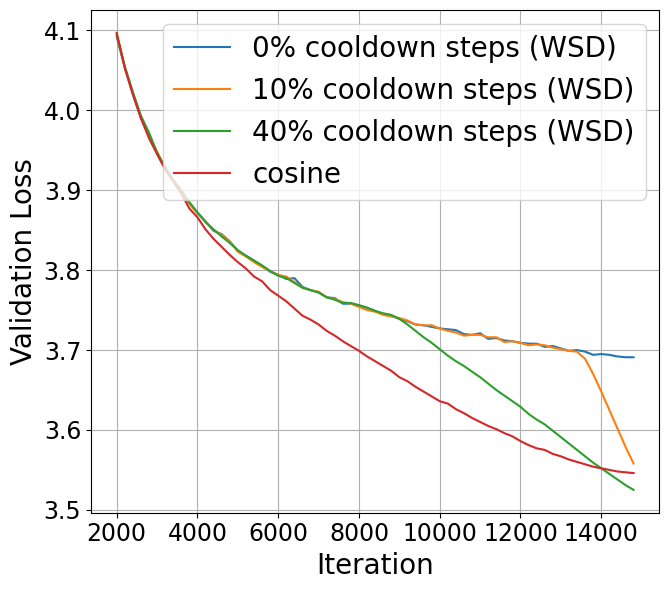

In [5]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(7, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps (WSD)', '10% cooldown steps (WSD)', '40% cooldown steps (WSD)', 'cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup1500_w_cos.pdf')

plt.show()


### 1500 加上初始

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.382    591.119  0.172903
2   400  0.007     5.557    259.011  0.206368
3   600  0.011     5.089    162.279  0.233029
4   800  0.014     4.649    104.444  0.279470
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.391    596.349  0.172157
2   400  0.007     5.559    259.502  0.206096
3   600  0.011     5.085    161.591  0.232778
4   800  0.014     4.647    104.288  0.279596
找到 65 条 Iter 在 2000 和 14800

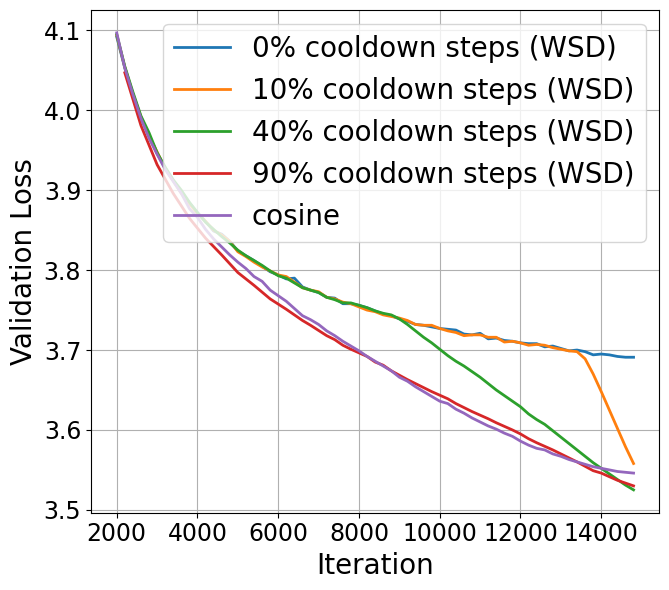

In [10]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.9_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(7, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps (WSD)', '10% cooldown steps (WSD)', '40% cooldown steps (WSD)', '90% cooldown steps (WSD)', 'cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', linewidth = 2, label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup1500_w_cos_90.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup1500_w_cos_90.png')

plt.show()


### warmup300 w/ cosine

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014713
1   200  0.004     5.790    326.975  0.187501
2   400  0.007     4.921    137.192  0.248984
3   600  0.011     4.503     90.243  0.294805
4   800  0.014     4.332     76.059  0.310078
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     5.769    320.110  0.188629
2   400  0.007     4.939    139.616  0.246272
3   600  0.011     4.501     90.098  0.294773
4   800  0.014     4.327     75.705  0.310573
找到 65 条 Iter 在 2000 和 14800 之

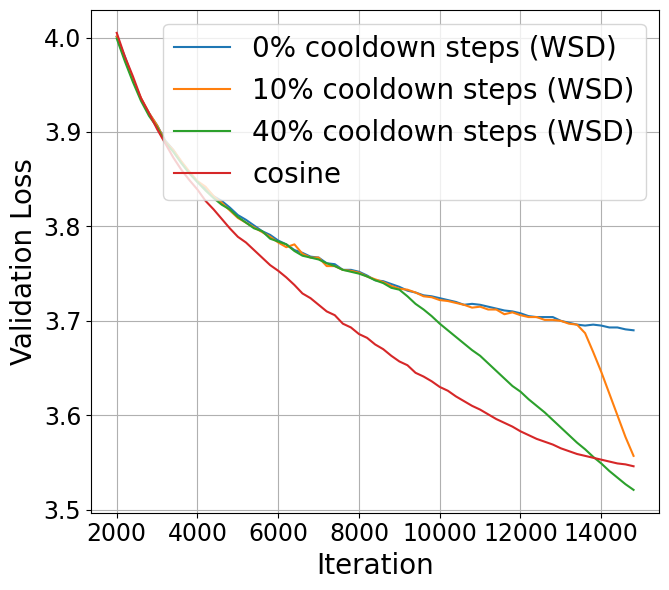

In [6]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17


# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(7, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps (WSD)', '10% cooldown steps (WSD)', '40% cooldown steps (WSD)', 'cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup300_w_cos.pdf')

plt.show()


### 300 加上初始

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014713
1   200  0.004     5.790    326.975  0.187501
2   400  0.007     4.921    137.192  0.248984
3   600  0.011     4.503     90.243  0.294805
4   800  0.014     4.332     76.059  0.310078
找到 65 条 Iter 在 2000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     5.769    320.110  0.188629
2   400  0.007     4.939    139.616  0.246272
3   600  0.011     4.501     90.098  0.294773
4   800  0.014     4.327     75.705  0.310573
找到 65 条 Iter 在 2000 和 14800 之

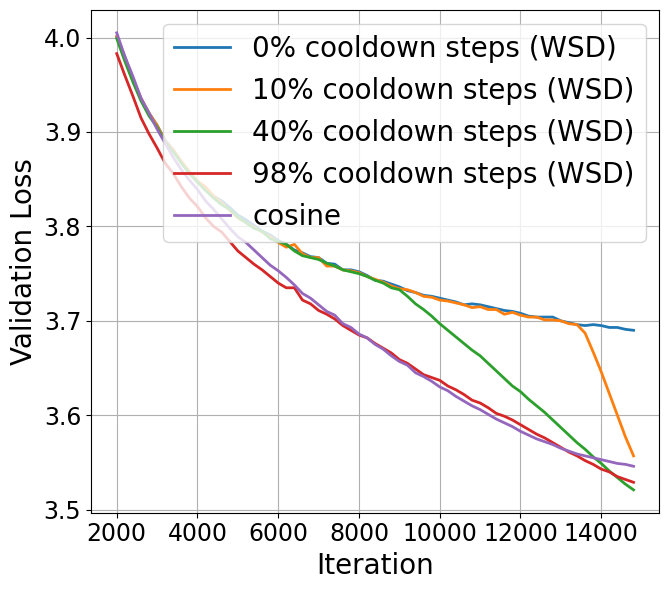

In [7]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.98_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(7, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 2000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0% cooldown steps (WSD)', '10% cooldown steps (WSD)', '40% cooldown steps (WSD)', '98% cooldown steps (WSD)', 'cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', linewidth = 2, label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_warmup300_w_cos_98.pdf')

plt.show()


## Effect of warmup (mainly about wsd)

### wsd cooldown 0.1 

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.091    441.828  0.159713
2   400  0.007     5.456    234.225  0.198925
3   600  0.011     4.908    135.384  0.251707
4   800  0.014     4.594     98.869  0.284653
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     5.769    320.110  0.188629
2   400  0.007     4.939    139.616  0.246272
3   600  0.011     4.501     90.098  0.294773
4   800  0.014     4.327     75.705  0.310573
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取

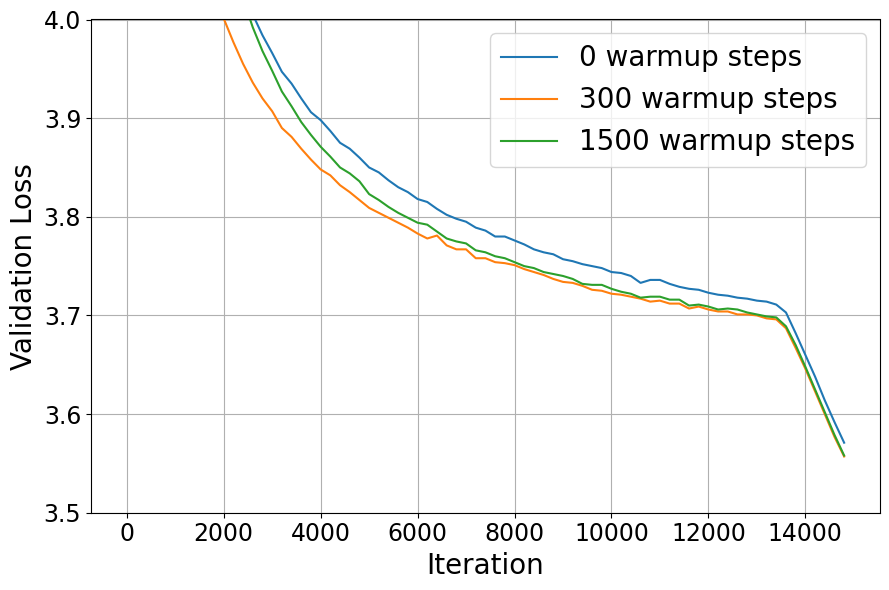

In [22]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 0
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0 warmup steps', '300 warmup steps', '1500 warmup steps']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,4])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_cooldown01.pdf')

plt.show()


### wsd cooldown 0.0

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.077    435.747  0.161056
2   400  0.007     5.415    224.732  0.202323
3   600  0.011     4.885    132.352  0.254307
4   800  0.014     4.592     98.691  0.286259
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014713
1   200  0.004     5.790    326.975  0.187501
2   400  0.007     4.921    137.192  0.248984
3   600  0.011     4.503     90.243  0.294805
4   800  0.014     4.332     76.059  0.310078
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取

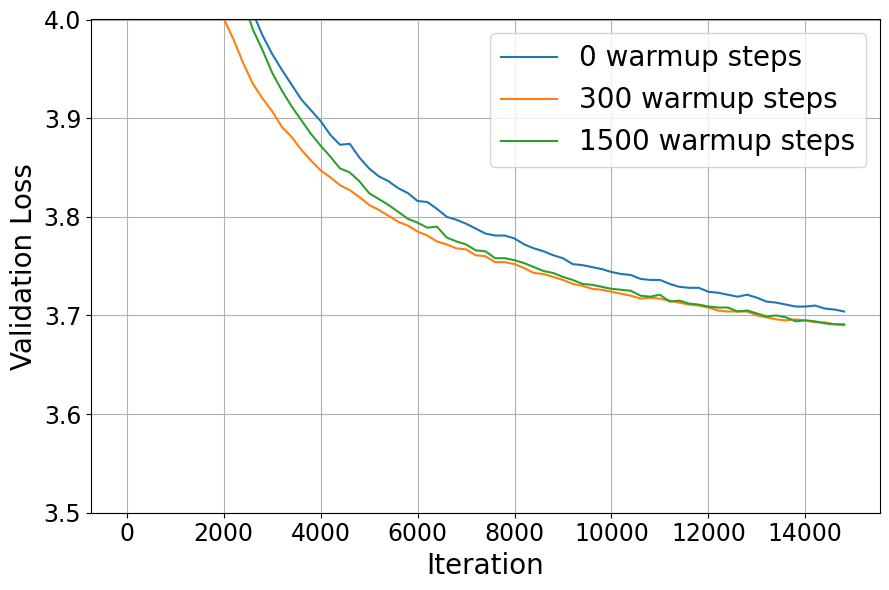

In [28]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.0_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 0
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0 warmup steps', '300 warmup steps', '1500 warmup steps']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,4])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_cooldown00.pdf')

plt.show()


### wsd cooldown 0.4

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014722
1   200  0.004     6.105    448.035  0.157758
2   400  0.007     5.451    233.028  0.200193
3   600  0.011     4.899    134.157  0.252783
4   800  0.014     4.595     98.945  0.284568
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     5.759    316.989  0.188081
2   400  0.007     4.923    137.411  0.248827
3   600  0.011     4.497     89.767  0.295636
4   800  0.014     4.326     75.637  0.310537
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取

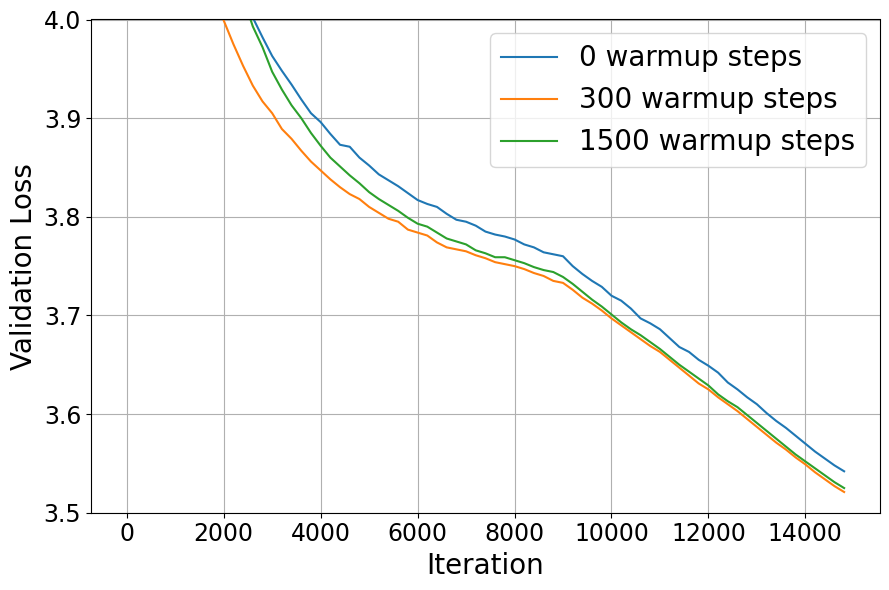

In [27]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup0_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup300_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 0
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0 warmup steps', '300 warmup steps', '1500 warmup steps']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,4])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_cooldown04.pdf')

plt.show()


### cosine (diff warmups)

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.080    436.878  0.160581
2   400  0.007     5.400    221.389  0.203635
3   600  0.011     4.860    129.040  0.257040
4   800  0.014     4.583     97.831  0.286466
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014713
1   200  0.004     5.858    349.917  0.182350
2   400  0.007     5.002    148.703  0.237667
3   600  0.011     4.520     91.820  0.294030
4   800  0.014     4.347     77.268  0.309012
找到 75 条 Iter 在 0 和 14800 之间的数据。
读取

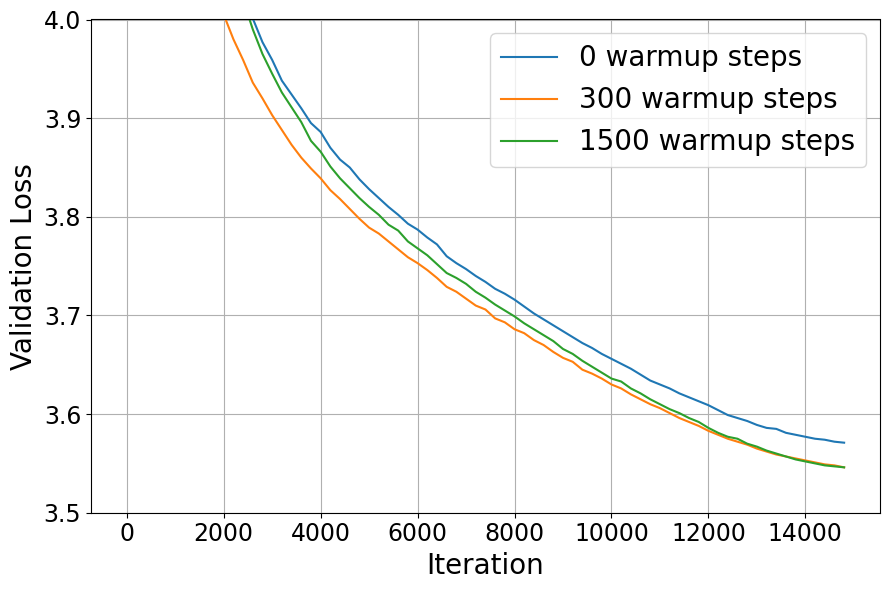

In [25]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup0_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup300_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 0
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['0 warmup steps', '300 warmup steps', '1500 warmup steps']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,4])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/cosine_diffwarmup.pdf')

plt.show()


## 之前废了的图

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.359   1570.850  0.145345
2   400  0.007     5.980    395.495  0.190615
3   600  0.011     5.385    218.038  0.214321
4   800  0.014     4.830    125.165  0.262415
找到 45 条 Iter 在 6000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.376    587.458  0.172985
2   400  0.007     5.556    258.706  0.206300
3   600  0.011     5.079    160.567  0.234348
4   800  0.014     4.650    104.535  0.279635
找到 45 条 Ite

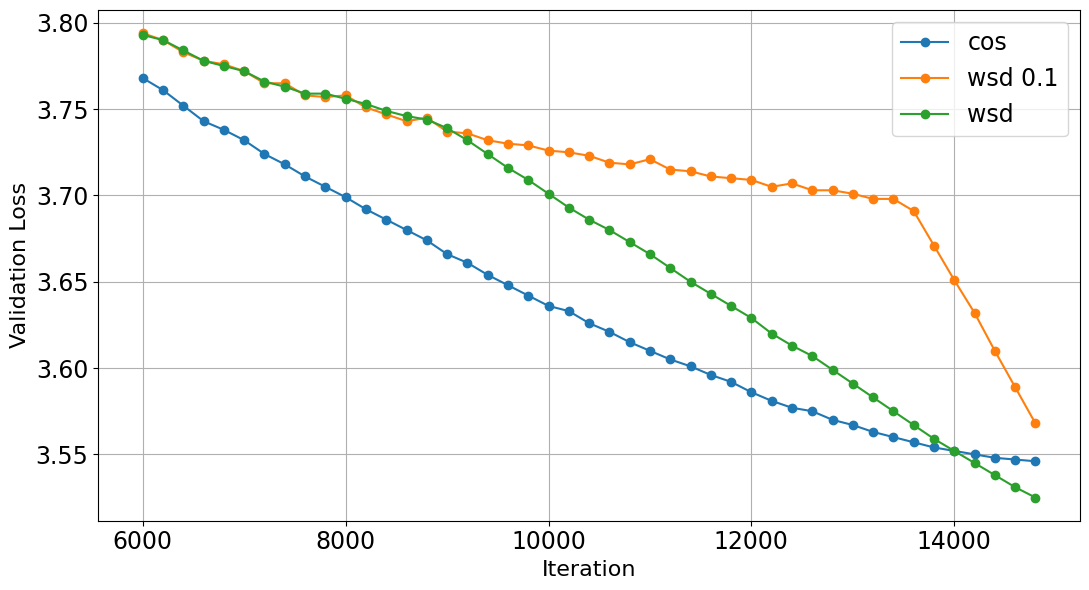

In [5]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径
## 这里的第三个choice实际上有点问题，因为warmup用的是wsd而不是cos。


prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17


# 创建图形
plt.figure(figsize=(11, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 6000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['cos', 'wsd 0.1', 'wsd']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.xlabel('Iteration', fontsize=16)
plt.ylabel('Validation Loss', fontsize=16)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=17)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/xxxx.pdf')

plt.show()


## difference of final lr

### wsd 1500 warmups, final lr 0, 0.05, 0.1, 0.2

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.378    588.945  0.172698
2   400  0.007     5.553    257.952  0.206707
3   600  0.011     5.087    161.924  0.233212
4   800  0.014     4.650    104.592  0.279364
找到 25 条 Iter 在 10000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.387    594.138  0.171613
2   400  0.007     5.556    258.758  0.206532
3   600  0.011     5.083    161.271  0.233490
4   800  0.014     4.644    103.977  0.280024
找到 25 条 I

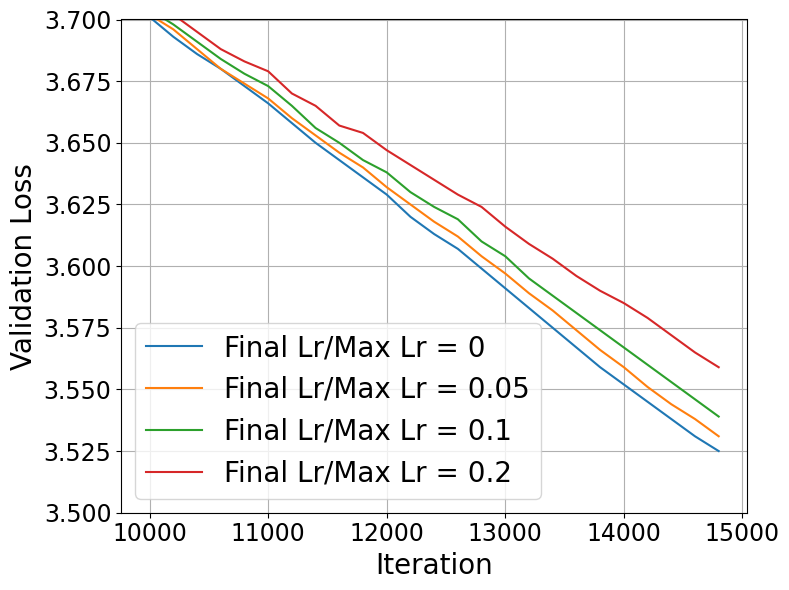

In [29]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.1_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(8, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 10000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['Final Lr/Max Lr = 0', 'Final Lr/Max Lr = 0.05', 'Final Lr/Max Lr = 0.1', 'Final Lr/Max Lr = 0.2']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,3.7])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_finalr.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/wsd_finalr.png')

plt.show()


### cos 1500 warmups, final lr 0, 0.05, 0.1, 0.2

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor1e-07_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.359   1570.719  0.145438
2   400  0.007     5.979    394.973  0.191072
3   600  0.011     5.369    214.595  0.215908
4   800  0.014     4.817    123.535  0.264183
找到 25 条 Iter 在 10000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.360   1571.136  0.145403
2   400  0.007     5.979    394.939  0.191449
3   600  0.011     5.370    214.909  0.215720
4   800  0.014     4.824    124.433  

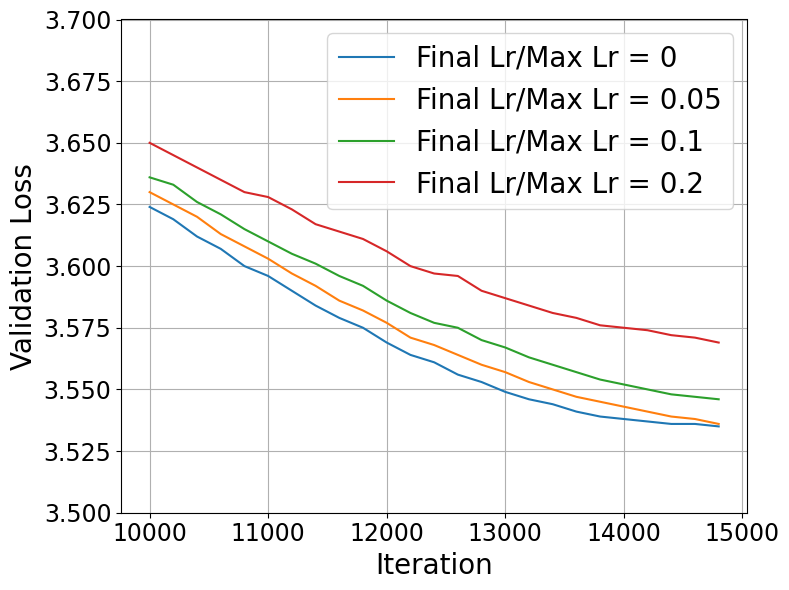

In [32]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor1e-07_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
                 'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]


plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(8, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 10000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['Final Lr/Max Lr = 0', 'Final Lr/Max Lr = 0.05', 'Final Lr/Max Lr = 0.1', 'Final Lr/Max Lr = 0.2']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,3.7])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Validation Loss from Iteration {start_iter} Onwards', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/cos_finalr.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/cos_finalr.png')

plt.show()


In [ ]:
### final lr 0

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.378    588.945  0.172698
2   400  0.007     5.553    257.952  0.206707
3   600  0.011     5.087    161.924  0.233212
4   800  0.014     4.650    104.592  0.279364
找到 25 条 Iter 在 10000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor1e-07_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.359   1570.719  0.145438
2   400  0.007     5.979    394.973  0.191072
3   600  0.011     5.369    214.595  0.215908
4   800  0.014     4.817    123.535  0.264183
找到 25 条 

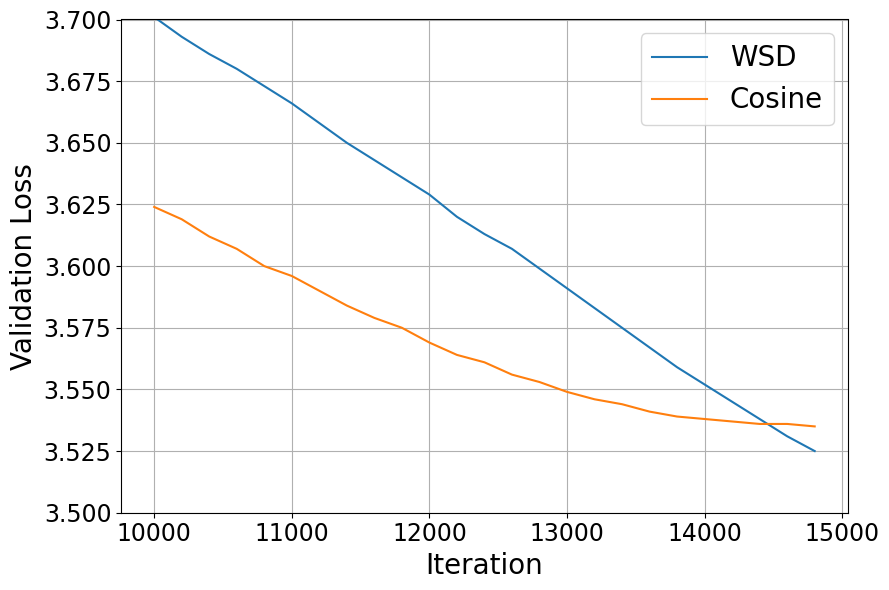

In [17]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor1e-07_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 10000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['WSD', 'Cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,3.7])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Final Lr/Max Lr = 0', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_0.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_0.png')

plt.show()


In [18]:
### final lr 0.05

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.387    594.138  0.171613
2   400  0.007     5.556    258.758  0.206532
3   600  0.011     5.083    161.271  0.233490
4   800  0.014     4.644    103.977  0.280024
找到 25 条 Iter 在 10000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.360   1571.136  0.145403
2   400  0.007     5.979    394.939  0.191449
3   600  0.011     5.370    214.909  0.215720
4   800  0.014     4.824    124.433  0

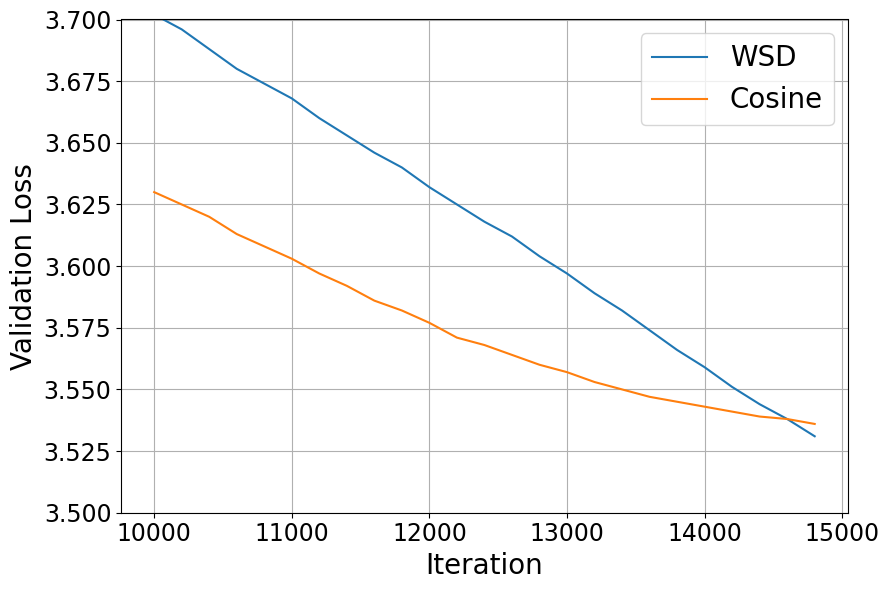

In [19]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 10000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['WSD', 'Cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,3.7])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Final Lr/Max Lr = 0', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_005.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_005.png')

plt.show()

In [20]:
### final lr 0.1

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.392  0.014713
1   200  0.004     6.375    587.130  0.173485
2   400  0.007     5.555    258.621  0.206033
3   600  0.011     5.083    161.259  0.232683
4   800  0.014     4.648    104.353  0.280089
找到 25 条 Iter 在 10000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.359   1570.850  0.145345
2   400  0.007     5.980    395.495  0.190615
3   600  0.011     5.385    218.038  0.214321
4   800  0.014     4.830    125.165  0.262415
找到 25 条 It

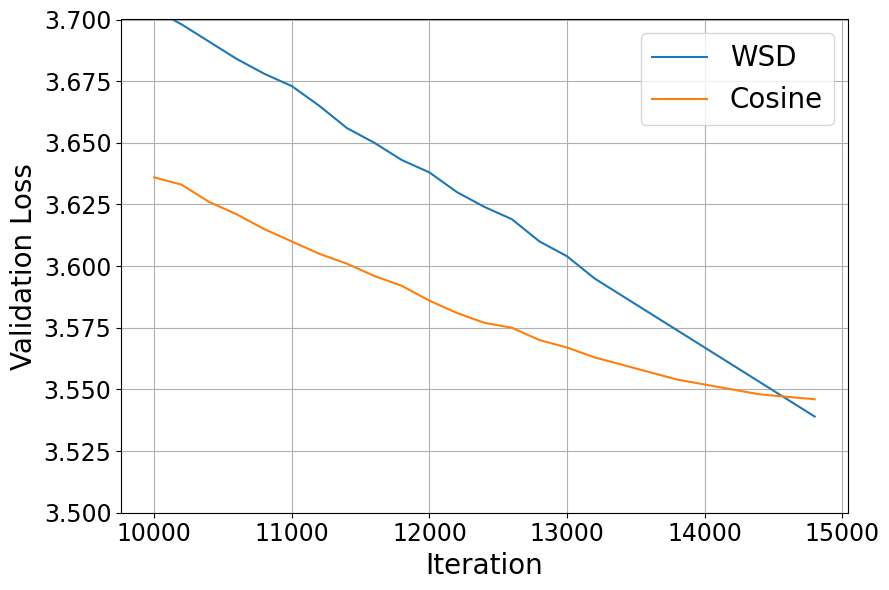

In [21]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.1_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 10000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['WSD', 'Cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,3.7])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Final Lr/Max Lr = 0', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_01.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_01.png')

plt.show()

In [22]:
### final lr 0.2 

读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     6.374    586.454  0.173160
2   400  0.007     5.554    258.197  0.206504
3   600  0.011     5.080    160.809  0.233737
4   800  0.014     4.646    104.139  0.279758
找到 25 条 Iter 在 10000 和 14800 之间的数据。
读取文件 /home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv 的原始数据:
   Iter  Epoch  val_loss     val_pp   val_acc
0     0  0.000    10.873  52757.342  0.014714
1   200  0.004     7.360   1571.191  0.145363
2   400  0.007     5.990    399.295  0.190616
3   600  0.011     5.366    213.974  0.215538
4   800  0.014     4.818    123.723  0.2

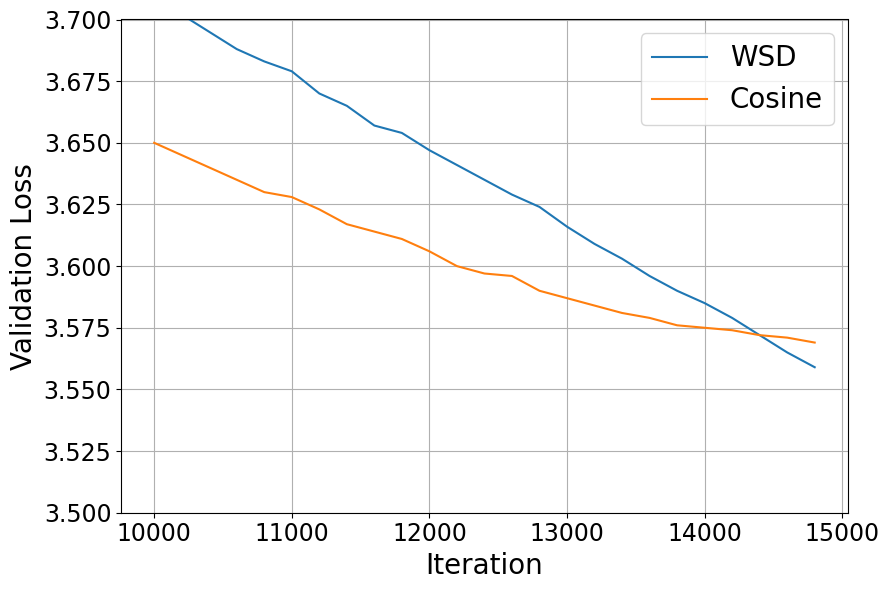

In [23]:
# 导入必要的库
import pandas as pd
import matplotlib.pyplot as plt

# 文件路径列表 (请替换为你的文件路径)
raw_csv_files = ['slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv', \
             'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv']  # 这里列出所有文件路径

prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

csv_files = [prefix + file_name for file_name in raw_csv_files]

plt.rcParams['axes.labelsize'] = 17
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17

# 创建图形
plt.figure(figsize=(9, 6))

# 迭代读取多个 CSV 文件并绘图
for i, csv_file in enumerate(csv_files):
    # 读取数据
    df = pd.read_csv(csv_file)
    
    # 显示前几行数据
    print(f"读取文件 {csv_file} 的原始数据:")
    print(df.head())

    # 数据预处理
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    # 过滤数据
    start_iter = 10000
    end_iter = 14800   # 结束迭代步数
    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]

    # 检查过滤后的数据是否为空
    if df_filtered.empty:
        print(f"没有找到 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")
    else:
        print(f"找到 {len(df_filtered)} 条 Iter 在 {start_iter} 和 {end_iter} 之间的数据。")

        # 绘制每个文件的 val_loss
        labels = ['WSD', 'Cosine']
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=labels[i])
    
        # 绘制每个文件的 val_loss
        # plt.plot(df_filtered['Iter'], df_filtered['val_loss'], marker='o', linestyle='-', label=f'Validation Loss from {csv_file}')
    
# 图形设置
plt.ylim([3.5,3.7])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
# plt.title(f'Final Lr/Max Lr = 0', fontsize=16)
plt.legend(fontsize=20)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_02.pdf')
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/finalr_02.png')

plt.show()

In [ ]:
### 合起来画图

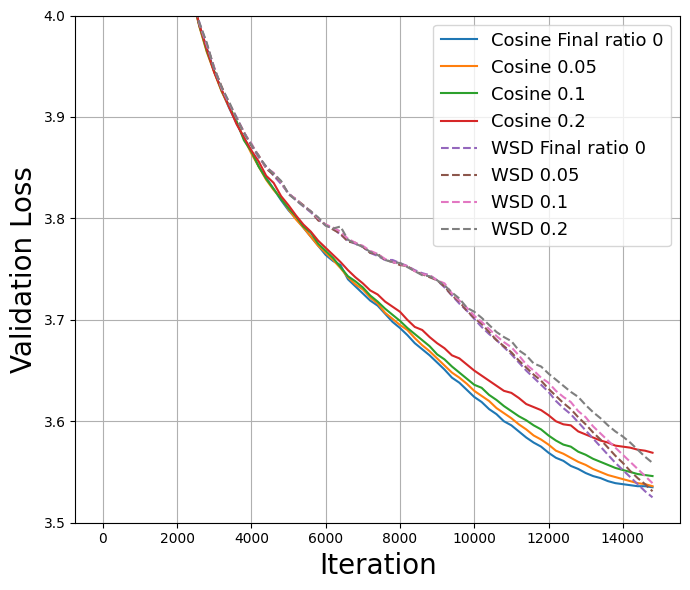

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 配置部分 =====
start_iter = 0
end_iter = 14800

# final ratio 列表
final_ratios = [0, 0.05, 0.1, 0.2]
labels = ['Final ratio 0', '0.05', '0.1', '0.2']

# 路径前缀（请根据实际情况修改）
prefix = "/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/logs_wsd/"

# cosine的文件列表（请根据实际文件名修改）
cosine_raw_csv_files = [
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor1e-07_seed0_data_seed1337_test.csv',
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv',
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv',
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_cos_warmup1500_decay_linear_0.1_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv'
]

# wsd的文件列表（请根据实际文件名修改）
wsd_raw_csv_files = [
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_seed0_data_seed1337_test.csv',
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.05_seed0_data_seed1337_test.csv',
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.1_seed0_data_seed1337_test.csv',
    'slimpajama_llama_nlayers8_nhead6_lr0.002_sched_wsd_warmup1500_decay_linear_0.4_iter15000_bs50x4_ws1_finalrfactor0.2_seed0_data_seed1337_test.csv'
]

cosine_csv_files = [prefix + file_name for file_name in cosine_raw_csv_files]
wsd_csv_files = [prefix + file_name for file_name in wsd_raw_csv_files]

# ===== 绘图 =====
plt.figure(figsize=(7, 6))

# 循环绘制cosine数据（实线）
for i, csv_file in enumerate(cosine_csv_files):
    df = pd.read_csv(csv_file)
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]
    if not df_filtered.empty:
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='-', label=f'Cosine {labels[i]}')

# 循环绘制wsd数据（虚线）
for i, csv_file in enumerate(wsd_csv_files):
    df = pd.read_csv(csv_file)
    df['Iter'] = pd.to_numeric(df['Iter'], errors='coerce')
    df['val_loss'] = pd.to_numeric(df['val_loss'], errors='coerce')
    df = df.dropna(subset=['Iter', 'val_loss'])

    df_filtered = df[(df['Iter'] >= start_iter) & (df['Iter'] <= end_iter)]
    if not df_filtered.empty:
        plt.plot(df_filtered['Iter'], df_filtered['val_loss'], linestyle='--', label=f'WSD {labels[i]}')

plt.ylim([3.5,4])
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Validation Loss', fontsize=20)
plt.legend(fontsize=13)
plt.grid(True)
plt.tight_layout()

# 保存图表为 PDF
plt.savefig('/home/chenyupeng/yupeng/jaggi-lr/wandb2csv/plots/combined_finalr.pdf')

plt.show()
